### Creating Latent Vectors

In [2]:
import os
os.chdir("/home/dela5824/diffAE/repo/diffae")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from templates import *
from templates_cls import *
from experiment_classifier import ClsModel

/share/home/dela5824/diffAE/repo/diffae/metrics.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [5]:
device = 'cuda:3'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [6]:
cls_conf = ffhq256_autoenc_cls()
cls_model = ClsModel(cls_conf)
state = torch.load(f'checkpoints/{cls_conf.name}/last.ckpt',
                    map_location='cpu')
print('latent step:', state['global_step'])
cls_model.load_state_dict(state['state_dict'], strict=False);
cls_model.to(device);

Global seed set to 0


loading pretrain ... 130M
step: 1563562
loading latent stats ...
latent step: 9375


In [15]:
data = ImageDataset("../../../CelebA/celeba-dataset/img_align_celeba/img_align_celeba", image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
print(data.paths[0])

144960.jpg


In [12]:
import numpy as np
num_samples = len(data)
dimension = 512
latent = np.zeros((num_samples, dimension))

In [16]:
from torch.utils.data import DataLoader

print("total batches: ", len(data) // 8)

batches = DataLoader(data, batch_size=8, shuffle=False)
i = 0
for batch in batches :
    cond = model.encode(batch['img'][None].squeeze(0).to(device))
    latent[i*8: i*8+ cond.shape[0]] = cond.cpu().detach().numpy()

    i += 1
    print(i)

total batches:  25324
1
2
3
4
5
6
7


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
28

In [17]:
with open("/home/dela5824/diffAE/latent_analysis/celebA_latents/latent.npy","wb") as f:
    np.save(f, latent)

In [11]:
import pickle

with open("/home/dela5824/diffAE/latent_analysis/celebA_latents/indexes","rb") as f:
    a = pickle.load(f)



[PosixPath('144960.jpg'), PosixPath('113286.jpg'), PosixPath('151302.jpg'), PosixPath('197547.jpg'), PosixPath('015875.jpg'), PosixPath('021185.jpg'), PosixPath('168651.jpg'), PosixPath('115575.jpg'), PosixPath('166314.jpg'), PosixPath('086163.jpg'), PosixPath('183343.jpg'), PosixPath('190572.jpg'), PosixPath('011167.jpg'), PosixPath('072133.jpg'), PosixPath('095009.jpg'), PosixPath('047405.jpg'), PosixPath('188011.jpg'), PosixPath('080343.jpg'), PosixPath('038788.jpg'), PosixPath('057596.jpg'), PosixPath('015748.jpg'), PosixPath('143917.jpg'), PosixPath('199656.jpg'), PosixPath('044632.jpg'), PosixPath('111337.jpg'), PosixPath('115601.jpg'), PosixPath('182061.jpg'), PosixPath('179471.jpg'), PosixPath('051298.jpg'), PosixPath('201108.jpg'), PosixPath('139893.jpg'), PosixPath('107101.jpg'), PosixPath('195905.jpg'), PosixPath('157835.jpg'), PosixPath('170718.jpg'), PosixPath('024378.jpg'), PosixPath('150314.jpg'), PosixPath('084038.jpg'), PosixPath('022264.jpg'), PosixPath('067606.jpg'),

In [17]:
str(a[0])

'144960.jpg'

In [22]:
# "/share/home/dela5824/CelebA/celeba-dataset/img_align_celeba/"
print(os.getcwd())
print((os.listdir("../../../CelebA/celeba-dataset/img_align_celeba/img_align_celeba")))
# print(os.path.relpath( "/share/home/dela5824/CelebA/celeba-dataset/img_align_celeba/","/home/dela5824/diffAE/repo/diffae" ))

/share/home/dela5824/diffAE/repo/diffae
['img_align_celeba']


### TSNE and UMAP plots

In [7]:
# Create TSNE graph

# from sklearn.manifold import TSNE
# from sklearn.datasets import load_iris
# from numpy import reshape
# import pandas as pd  

# iris = load_iris()
# x = iris.data
# y = iris.target 

# print(type(x), x.shape)
# print(type(y), y.shape)

import os
os.getcwd()

'/share/home/dela5824/diffAE/latent_analysis'

In [19]:
import os
# print(os.listdir("../../../CelebA/celeba-dataset/img_align_celeba/"))
print(os.listdir("../../CelebA/celeba-dataset/list_attr_celeba.csv"))

['list_bbox_celeba.csv', 'list_landmarks_align_celeba.csv', 'list_attr_celeba.csv', 'img_align_celeba', 'identity_CelebA.txt', 'list_eval_partition.csv']


In [48]:
# Create TSNE graph
import numpy as np
import pickle
import pandas as pd

latent = np.load("celebA_latents/latent.npy")

indexes = pickle.load(open("celebA_latents/indexes", "rb"))

attr = pd.read_csv("../../CelebA/celeba-dataset/list_attr_celeba.csv")
attr.set_index("image_id", inplace=True)

bin_attributes = np.zeros((latent.shape[0], 40))

for i in range(len(indexes)):
    bin_attributes[i] = attr.loc[str(indexes[i])].values


In [54]:
print(latent.shape)
print(bin_attributes.shape)
a = np.expand_dims(bin_attributes[:, 0], axis=1)
print(a.shape)
print(bin_attributes[:, 0].shape)

(202599, 512)
(202599, 40)
(202599, 1)
(202599,)


In [56]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(latent) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 202599 samples in 0.038s...
[t-SNE] Computed neighbors for 202599 samples in 63.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 202599
[t-SNE] Computed conditional probabilities for sample 2000 / 202599
[t-SNE] Computed conditional probabilities for sample 3000 / 202599
[t-SNE] Computed conditional probabilities for sample 4000 / 202599
[t-SNE] Computed conditional probabilities for sample 5000 / 202599
[t-SNE] Computed conditional probabilities for sample 6000 / 202599
[t-SNE] Computed conditional probabilities for sample 7000 / 202599
[t-SNE] Computed conditional probabilities for sample 8000 / 202599
[t-SNE] Computed conditional probabilities for sample 9000 / 202599
[t-SNE] Computed conditional probabilities for sample 10000 / 202599
[t-SNE] Computed conditional probabilities for sample 11000 / 202599
[t-SNE] Computed conditional probabilities for sample 12000 / 202599
[t-SNE] Computed conditional probab

(202599, 2)


[Text(0.5, 1.0, ' T-SNE projection')]

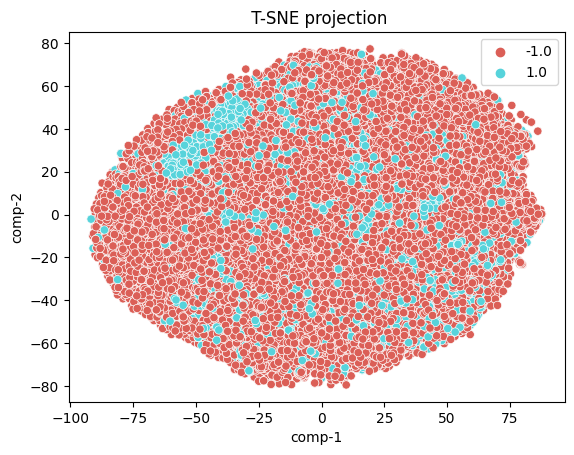

In [67]:
print(z.shape)
labels = pd.DataFrame()
labels["y"] = bin_attributes[:,5]
labels["comp-1"] = z[:,0]
labels["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=labels.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=labels).set(title=" T-SNE projection") 